# Bank Marketing Campaign Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#pull data
bank_data= pd.read_csv(r"C:\Users\wenxu\Desktop\RISE\Python\Packt Data Analysis Workshop\Bank Marketing Campaign Data\bank-additional-full.csv", sep=";")

In [2]:
#visualize the head of the dataset
bank_data.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [3]:
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
# define numerical features
numerical_features = [col for col in bank_data.columns if np.issubdtype(bank_data[col].dtype, np.number)]
print(numerical_features)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [5]:
# print statistics abnout the different numerical columns
bank_data[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


C:\Users\wenxu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wenxu\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\wenxu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarn

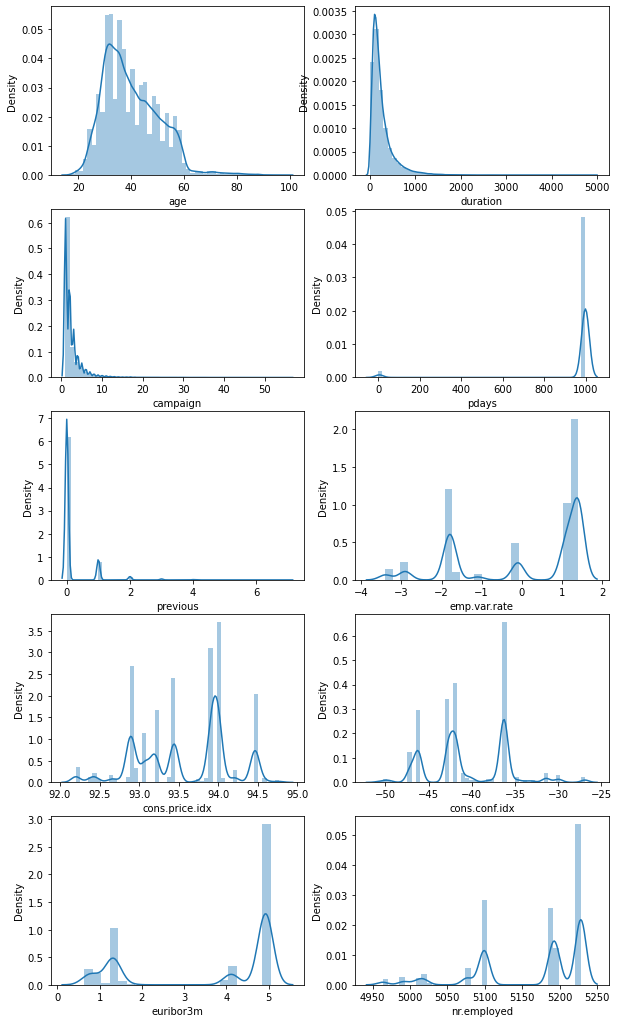

In [6]:
# plot distributions of numerical features
plt.figure(figsize= (10,18))
for index, col in enumerate(numerical_features):
    plt.subplot(5,2,index+1)
    sns.distplot(bank_data[col], kde_kws={'bw':0.1})


### From the plots, only age and duration columns have a regular distribution of values, as the others seem scattered and only have a few values present.

In [7]:
# define categorical features
categorical_features= [col for col in bank_data.columns if pd.api.types.is_string_dtype(bank_data[col])]
print(categorical_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


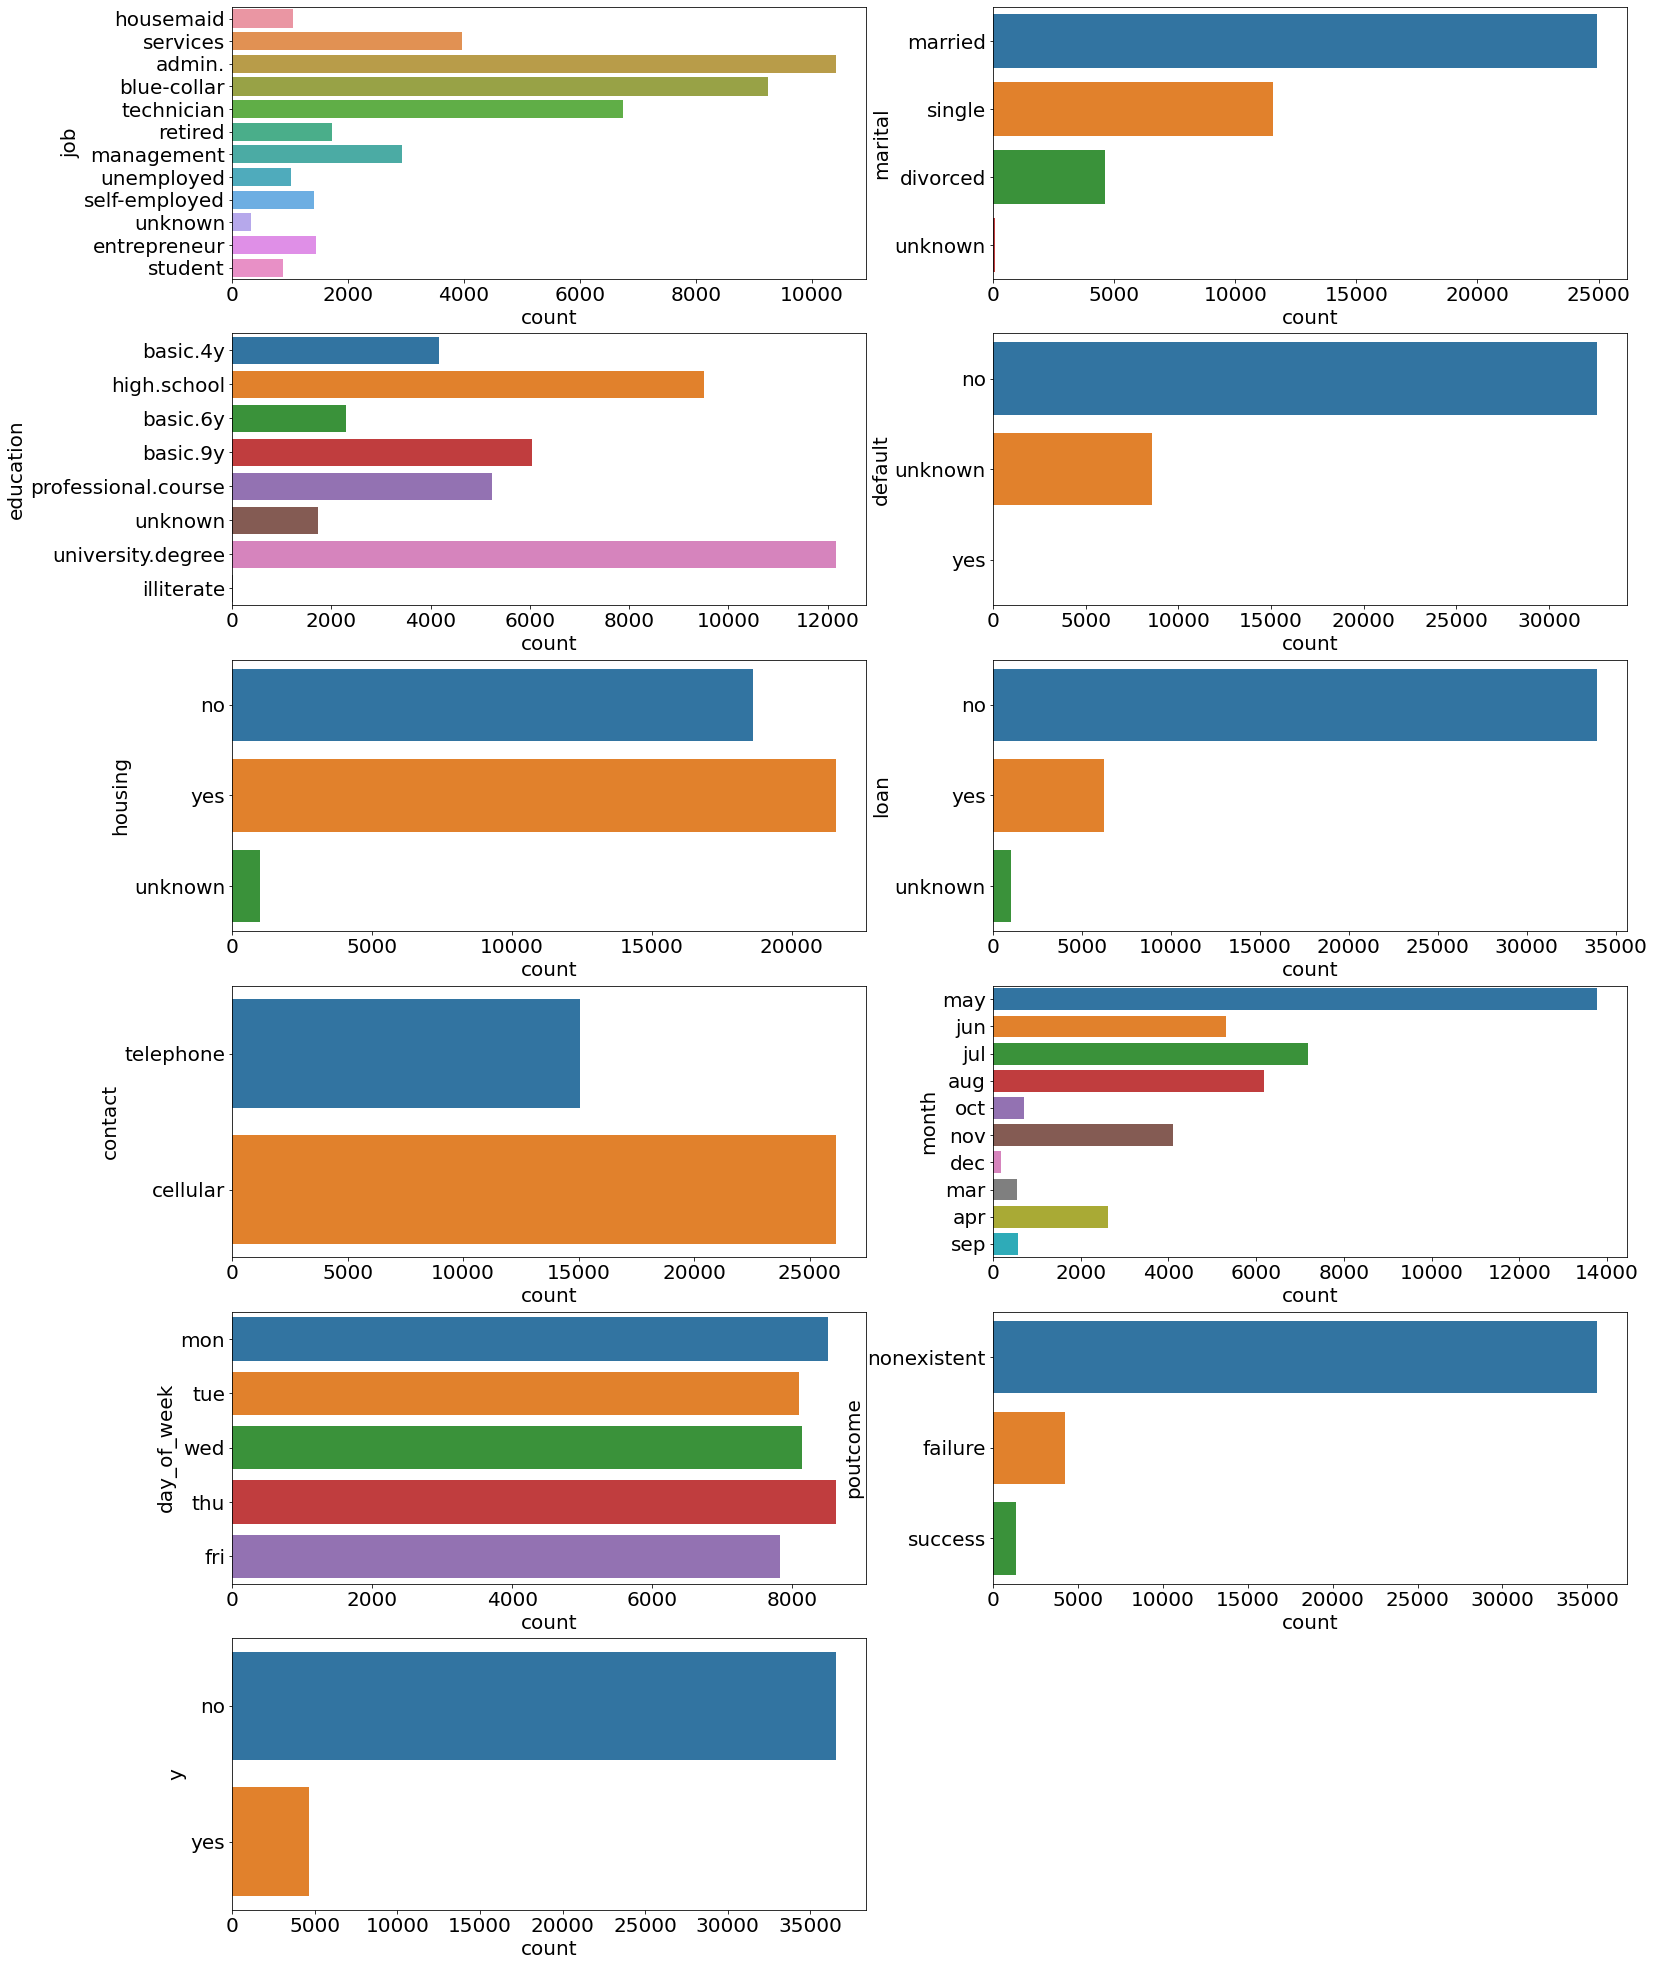

In [8]:
# plot distributions of categorical features
plt.figure(figsize= (25,35))
for index, col in enumerate(categorical_features):
    plt.subplot(6,2,index+1)
    ax= sns.countplot(y=col, data=bank_data)
    ax.set_xlabel("count", fontsize=20)
    ax.set_ylabel(col, fontsize=20)
    ax.tick_params(labelsize=20)    

In [9]:
# compute number of entries in y column
print("Total number of entries:")
print(bank_data["y"].value_counts(ascending=False))
print()
print("Percentages:")
print(bank_data["y"].value_counts(normalize=True, ascending=False)*100)

Total number of entries:
no     36548
yes     4640
Name: y, dtype: int64

Percentages:
no     88.734583
yes    11.265417
Name: y, dtype: float64


### Only 11.3% of the contacted customers decide to accept the offer from the bank.

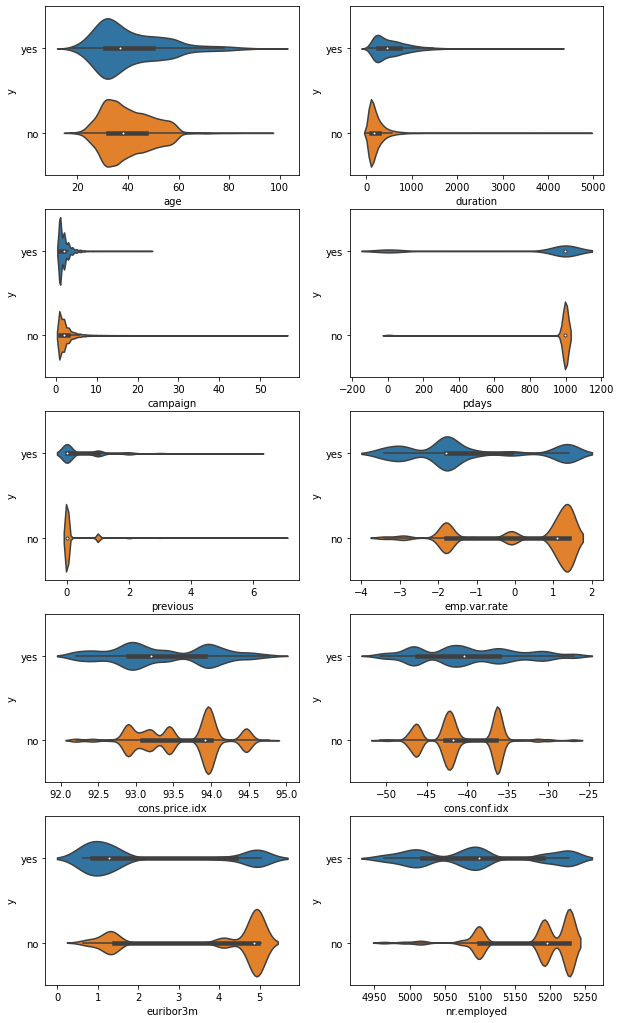

In [10]:
# create violin plots for succesful and non-succesful marketing campaigns

plt.figure(figsize=(10,18))
for index, col in enumerate(numerical_features):
    plt.subplot(5,2,index+1)
    sns.violinplot(x=col, y="y", data=bank_data, order=["yes","no"])

In [11]:
from scipy.stats import ttest_ind
# define function for computing mean of column for yes and no cases, as well as the test statistics and pvalue for equlity of means test

def test_means(data, col):
    yes_mask = data["y"] == "yes"
    values_yes = data[col][yes_mask]
    values_no = data[col][~yes_mask]
    mean_yes = values_yes.mean()
    mean_no = values_no.mean()
    
    ttest_res = ttest_ind(values_yes, values_no)
    
    return [col, mean_yes, mean_no, round(ttest_res[0], 4), round(ttest_res[1], 4)]

In [12]:
# define pandas dataframe, in which values should be filled
test_df= pd.DataFrame(columns= ["column", "mean yes", "mean no", "ttest stat", "ttest pval"])

# for each column in the numerical_features, compute means and test statistics and fill the values in the dataframe
for index, col in enumerate(numerical_features):
    test_df.loc[index] = test_means(bank_data, col)
    
test_df

,column,mean yes,mean no,ttest stat,ttest pval
0,age,40.913147,39.911185,6.1721,0.0
1,duration,553.191164,220.844807,89.9672,0.0
2,campaign,2.051724,2.633085,-13.4965,0.0
3,pdays,792.035560,984.113878,-69.7221,0.0
4,previous,0.492672,0.132374,48.0027,0.0
5,emp.var.rate,-1.233448,0.248875,-63.4337,0.0
6,cons.price.idx,93.354386,93.603757,-27.9032,0.0
7,cons.conf.idx,-39.789784,-40.593097,11.1539,0.0
8,euribor3m,2.123135,3.811491,-65.6466,0.0
9,nr.employed,5095.115991,5176.166600,-76.9845,0.0


### There is a statistically significant difference in the mean values for each of the numerical columns(the results from the p-value in the ttest pval column). This means that for each of the numerical features, the average value for successful marketing campaigns is significantly different that the average value for unsuccesful marketing campaigns.


In [13]:
from scipy.stats import ks_2samp

# define function which performs Kolmogorov-Smirnov test, for provided column
def test_ks(data, col):
    yes_mask = data["y"] == "yes"
    values_yes = data[col][yes_mask]
    values_no = data[col][~yes_mask]
    
    kstest_res = ks_2samp(values_yes, values_no)
    return [col, round(kstest_res[0], 4), round(kstest_res[1], 4)]

In [14]:
# definte pandas dataframe, in which values should be filled
test_df = pd.DataFrame(columns=["column","ks stat", "ks pval"])

# for each column in the numerical_features, compute test statistics and fill the values in the dataframe
for index, col in enumerate(numerical_features):
    test_df.loc[index] = test_ks(bank_data, col)
    
test_df

,column,ks stat,ks pval
0,age,0.0861,0.0
1,duration,0.4641,0.0
2,campaign,0.0808,0.0
3,pdays,0.1934,0.0
4,previous,0.2102,0.0
5,emp.var.rate,0.4324,0.0
6,cons.price.idx,0.2281,0.0
7,cons.conf.idx,0.1998,0.0
8,euribor3m,0.4326,0.0
9,nr.employed,0.4324,0.0


### We can observe that the distributions of the various numerical features present a significant difference between successful and unsuccessful marketing campaigns.

In [15]:
# create arrays containing campaign and financial columns
campaign_columns = ["age", "duration", "campaign", "previous"]
financial_columns = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]

C:\Users\wenxu\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\wenxu\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\wenxu\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\wenxu\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depr

<Figure size 720x720 with 0 Axes>

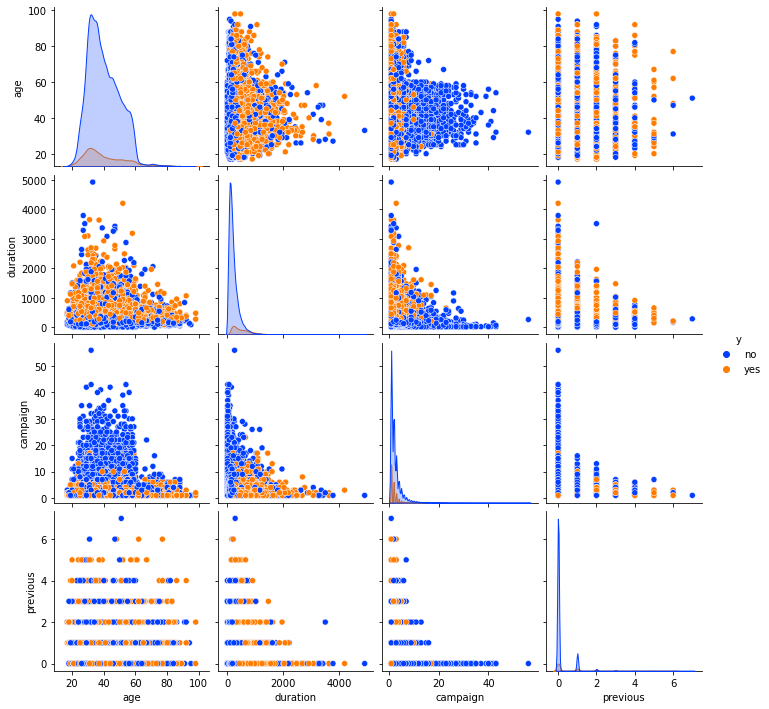

In [16]:
# create pairplot between campaign columns
plot_data = bank_data[campaign_columns + ["y"]]
plt.figure(figsize= (10,10))
sns.pairplot(plot_data, hue="y", palette="bright", diag_kws= {'bw':0.1})

### Most of the successful marketing campaigns were with newly contacted customers, while there isn't more than a single follow up for this campaign.

<Figure size 720x720 with 0 Axes>

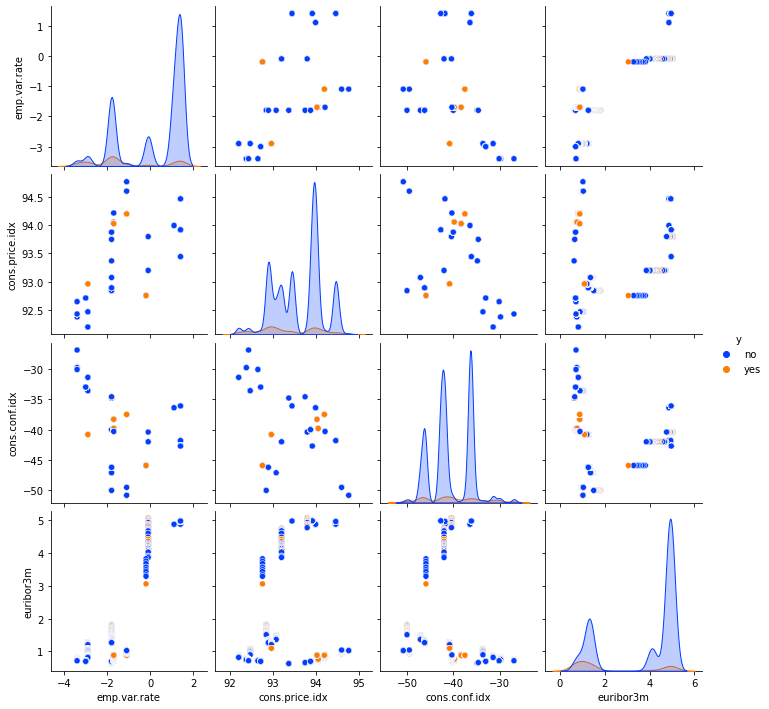

In [17]:
# create pairplot between financial features
plot_data = bank_data[financial_columns + ["y"]]
plt.figure(figsize= (10,10))
sns.pairplot(plot_data, hue="y", palette="bright")

### Not surprisingly, the number of successful marketing calls drops as the 3-month interest rates(euribor3m column) increases. A possible explanation for this phenomenon is customer optimism when interest rates are lower.

In [18]:
# create mask for successful calls
successful_calls = bank_data.y == "yes"

# plot correlation matrix for successfull calls
plot_data = bank_data[campaign_columns + financial_columns][successful_calls]
successful_corr = plot_data.corr()
successful_corr.style.background_gradient(cmap= 'coolwarm').set_precision(3)

C:\Users\wenxu\AppData\Local\Temp/ipykernel_12900/28817730.py:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  successful_corr.style.background_gradient(cmap= 'coolwarm').set_precision(3)


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.000,-0.059,-0.008,0.075,-0.082,-0.025,0.141,-0.085
duration,-0.059,1.000,0.157,-0.232,0.503,0.238,-0.144,0.500
campaign,-0.008,0.157,1.000,-0.104,0.222,0.117,-0.043,0.212
previous,0.075,-0.232,-0.104,1.000,-0.285,0.091,0.128,-0.392
emp.var.rate,-0.082,0.503,0.222,-0.285,1.000,0.660,-0.267,0.926
cons.price.idx,-0.025,0.238,0.117,0.091,0.660,1.000,-0.328,0.415
cons.conf.idx,0.141,-0.144,-0.043,0.128,-0.267,-0.328,1.000,-0.120
euribor3m,-0.085,0.500,0.212,-0.392,0.926,0.415,-0.120,1.000


In [19]:
# create mask for successful calls
unsuccessful_calls = bank_data.y == "no"
# plot correlation matrix for unsuccessfull calls
plot_data = bank_data[campaign_columns + financial_columns][unsuccessful_calls]
unsuccessful_corr = plot_data.corr()
unsuccessful_corr.style.background_gradient(cmap= 'coolwarm').set_precision(3)

C:\Users\wenxu\AppData\Local\Temp/ipykernel_12900/4046680201.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  unsuccessful_corr.style.background_gradient(cmap= 'coolwarm').set_precision(3)


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.000,0.001,0.008,-0.003,0.027,0.011,0.125,0.041
duration,0.001,1.000,-0.083,-0.004,0.003,0.018,0.004,0.006
campaign,0.008,-0.083,1.000,-0.068,0.133,0.123,-0.007,0.115
previous,-0.003,-0.004,-0.068,1.000,-0.425,-0.272,-0.139,-0.442
emp.var.rate,0.027,0.003,0.133,-0.425,1.000,0.797,0.319,0.976
cons.price.idx,0.011,0.018,0.123,-0.272,0.797,1.000,0.152,0.731
cons.conf.idx,0.125,0.004,-0.007,-0.139,0.319,0.152,1.000,0.393
euribor3m,0.041,0.006,0.115,-0.442,0.976,0.731,0.393,1.000


### We observe that euribor3m(average interest rate at which european banks lend money to other banks with a maturity of 3 months) and emp.var.rate(rate at which people are hired or fired in an economy) correlation is very high. Positive correlation means that in an expanding economy, in which more people are hired then fired, interest rates tend to be higher. 

### Another column that is highly correlated with the previous two is the Consumer Price Index(CPI) column cons.price.idx. A high positive correlation of CPI with the other two columns is a clear indicator of an expanding economy, in which growing employment means more people with money, hence more spending and higher inflation. Central banks tend to increase interest rates in order to keep inflation under control, which is in line with our observation of increasing the euribor3m column.

In [20]:
# plot difference in successful - unsuccessful correlation matrices
diff_corr= successful_corr - unsuccessful_corr
diff_corr.style.background_gradient(cmap='coolwarm').set_precision(4)

C:\Users\wenxu\AppData\Local\Temp/ipykernel_12900/3030870194.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  diff_corr.style.background_gradient(cmap='coolwarm').set_precision(4)


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,0.0000,-0.0601,-0.0163,0.0780,-0.1084,-0.0361,0.0165,-0.1268
duration,-0.0601,0.0000,0.2402,-0.2273,0.4996,0.2199,-0.1480,0.4932
campaign,-0.0163,0.2402,0.0000,-0.0363,0.0889,-0.0068,-0.0357,0.0965
previous,0.0780,-0.2273,-0.0363,0.0000,0.1400,0.3631,0.2669,0.0504
emp.var.rate,-0.1084,0.4996,0.0889,0.1400,0.0000,-0.1368,-0.5864,-0.0498
cons.price.idx,-0.0361,0.2199,-0.0068,0.3631,-0.1368,0.0000,-0.4806,-0.3162
cons.conf.idx,0.0165,-0.1480,-0.0357,0.2669,-0.5864,-0.4806,0.0000,-0.5133
euribor3m,-0.1268,0.4932,0.0965,0.0504,-0.0498,-0.3162,-0.5133,0.0000


### It is always important to remember that correlation does not imply causation. duration and emp.var.rate has a significant difference in the correlations, but the duration of the call should not be influenced by a macroeconomic factor like the employment variation rate or vice versa.

### Interesting fact: the consumer confidence index(cons.conf.idx) is negatively correlated with the 3 mentioned columns(emp.var.rate, cons.price.idx and euribor3m) for successful customer calls and positively correlated for unsuccessful ones. This means that when the overall economic sentiment is pessimistic, people are willing to accept the new banking products and vice versa.

# Linear Regression

### Applying linear regression in order to predict the consumer confidence index (cons.conf.idx column) based on the employment variation rate(emp.var.rate), CPI(cons.price.idx) and the 3-month interest rate(euribor3m).

In [21]:
import statsmodels.api as sm

# create feature matrix and target variable
X = bank_data[["emp.var.rate", "cons.price.idx", "euribor3m"]]
# add constant value for the intercept term
X = sm.add_constant(X)
y = bank_data["cons.conf.idx"]

#define and fit model
lineare_regression_model = sm.OLS(y, X)
result = lineare_regression_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          cons.conf.idx   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     2960.
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:22:23   Log-Likelihood:            -1.1753e+05
No. Observations:               41188   AIC:                         2.351e+05
Df Residuals:                   41184   BIC:                         2.351e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -82.4025      5.999    -13.

### Adj. R-squared metric takes into account the accuracy of the model (where value close to 0 mean predicting the average value of the target variable, thus almost no predictive power, while values close to 1 indicate a very accurate prediction model) Adj R-squared tends to increase as there are more features in the complexity of the model.

### coef column shows that cons.conf.idx is positively correlated with the cons.price.idx and euribor3m columns, and negatively correlated with emp.var.rate.

### P>|t| returns the p-value of the hypothesis test, in which the null hypothesis is that the relative coefficient is equal to zero. As the p-values are 0, each of the coefficients is statistically significant in our equation (when p-values are large, the feature associated with that value is not relevent for our linear regression model and can be removed from the equation without deteriorating the accuracy of the model).

# Logistic Regression

In [22]:
# create feature matrix and target variable
X = bank_data[["age", "duration", "campaign", "previous"]]
# add constant value for the intercept term
X = sm.add_constant(X)
# target has to be numeric
y = np.where(bank_data["y"] == "yes", 1,0)

# define and fit model
logistic_regression_model = sm.Logit(y, X)
result = logistic_regression_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.269969
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41183
Method:                           MLE   Df Model:                            4
Date:                Mon, 25 Sep 2023   Pseudo R-squ.:                  0.2331
Time:                        21:22:24   Log-Likelihood:                -11119.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7793      0.076    -49.435      0.000      -3.929      -3.629
age            0.0091      0.

In [23]:
# transform all features into numerical ones, by using the get_dummies() function
X = bank_data.drop("y", axis=1)
X = pd.get_dummies(X)
X= sm.add_constant(X)
print(X.columns)


Index(['const', 'age', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 

In [24]:
# extract and transform target variable
y = np.where(bank_data["y"] == "yes", 1, 0)

In [25]:
# define and fit model
full_logistic_regression_model = sm.Logit(y, X)
result = full_logistic_regression_model.fit(maxiter=500)
print(result.summary())

         Current function value: 0.207316
         Iterations: 500
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41135
Method:                           MLE   Df Model:                           52
Date:                Mon, 25 Sep 2023   Pseudo R-squ.:                  0.4111
Time:                        21:22:40   Log-Likelihood:                -8538.9
converged:                      False   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -67.1298        nan        nan        nan         nan         nan
age    

C:\Users\wenxu\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Important to note that P>|z| column has values that is equal to 1, which means that we cannot reject the null hypothesis stating that the coefficient for the respective column should be equal to zero. In otherwords, we have lots of redundant columns in our model.

### Furthermore, for some of the coefficients, we cannot even compute the p-values(NaN values), indicating that the optimization model running is not able to converge, which is another reason to reduce the number of features.

# Creating a leaner logistic regression model

In [26]:
# create feature matrix using a selection of the variables with a p-value smaller than 0.05 from the logistic model above
X = bank_data[["duration", "campaign", "pdays", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]]
# add constant value for the intercept term
X = sm.add_constant(X)
X.head()

,const,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,1.0,261,1,999,1.1,93.994,-36.4,4.857
1,1.0,149,1,999,1.1,93.994,-36.4,4.857
2,1.0,226,1,999,1.1,93.994,-36.4,4.857
3,1.0,151,1,999,1.1,93.994,-36.4,4.857
4,1.0,307,1,999,1.1,93.994,-36.4,4.857


In [27]:
# extract and transform target variable
y = np.where(bank_data["y"] == "yes", 1, 0)

In [28]:
# define and fit model
logistic_regression_model = sm.Logit(y, X)
result = logistic_regression_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.220751
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41180
Method:                           MLE   Df Model:                            7
Date:                Mon, 25 Sep 2023   Pseudo R-squ.:                  0.3729
Time:                        21:22:40   Log-Likelihood:                -9092.3
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -90.4650      5.683    -15.919      0.000    -101.603     -79.327
duration         

### Pr(y=yes) = exp(-90.4650 + 0.0045*duration - 0.0432*campaign - 0.0016*pdays - 0.7114*emp.var.rate + 0.9698*cons.price.idx + 0.0513*cons.conf.idx - 0.1996*euribor3m) / (1 + exp(-90.4650 + 0.0045*duration - 0.0432*campaign - 0.0016*pdays - 0.7114*emp.var.rate + 0.9698*cons.price.idx + 0.0513*cons.conf.idx - 0.1996*euribor3m))

### Pr(y=no) = 1 / (1 + exp(-90.4650 + 0.0045*duration - 0.0432*campaign - 0.0016*pdays - 0.7114*emp.var.rate + 0.9698*cons.price.idx + 0.0513*cons.conf.idx - 0.1996*euribor3m))